In [4]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

import numpy as np
import pandas
from numpy import *
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics, grid_search, cross_validation
from IPython.display import set_matplotlib_formats
from bokeh.plotting import figure, show, output_notebook
from sklearn.metrics import r2_score
from bokeh.layouts import gridplot
output_notebook()
set_matplotlib_formats('png', 'pdf')
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from sklearn.svm import SVC
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)

%matplotlib inline



Loading BokehJS ...

In [5]:
turnstile_weather = pandas.read_csv('turnstile_data_master_with_weather.csv')

In [6]:
print turnstile_weather.head(10)

   Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR              0.0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR            217.0   
2           2  R001  2011-05-01  09:00:00     9  REGULAR            890.0   
3           3  R001  2011-05-01  13:00:00    13  REGULAR           2451.0   
4           4  R001  2011-05-01  17:00:00    17  REGULAR           4400.0   
5           5  R001  2011-05-01  21:00:00    21  REGULAR           3372.0   
6           6  R002  2011-05-01  01:00:00     1  REGULAR              0.0   
7           7  R002  2011-05-01  05:00:00     5  REGULAR             42.0   
8           8  R002  2011-05-01  09:00:00     9  REGULAR             50.0   
9           9  R002  2011-05-01  13:00:00    13  REGULAR            316.0   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0            0.0         30.31       42.0   ...           39.0         

In [7]:
turnstile_weather['UNIT'].head(5)

0    R001
1    R001
2    R001
3    R001
4    R001
Name: UNIT, dtype: object

In [8]:
turnstile_weather.dtypes

Unnamed: 0           int64
UNIT                object
DATEn               object
TIMEn               object
Hour                 int64
DESCn               object
ENTRIESn_hourly    float64
EXITSn_hourly      float64
maxpressurei       float64
maxdewpti          float64
mindewpti          float64
minpressurei       float64
meandewpti         float64
meanpressurei      float64
fog                float64
rain               float64
meanwindspdi       float64
mintempi           float64
meantempi          float64
maxtempi           float64
precipi            float64
thunder            float64
dtype: object

In [9]:
turnstile_weather.describe()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.0
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0.0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0.0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0.0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0.0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0.0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0.0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0.0


In [10]:


def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    
    
    plt.figure()
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].hist() 
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].hist()
    plt.title("Histogram of ENTRIESn_hourly") 
    return plt


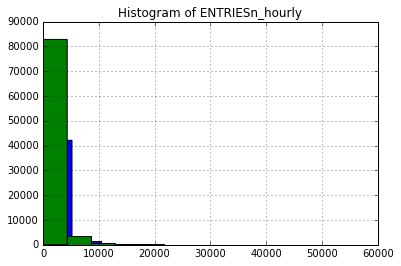

In [11]:
p = entries_histogram(turnstile_weather)

In [12]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    with_rain_mean =  turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].mean()
    print with_rain_mean
    without_rain_mean =  turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].mean()
    print without_rain_mean
    U, p = scipy.stats.mannwhitneyu(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].values,turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].values)
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader


In [13]:
rainMean, NorainMean, U, P =  mann_whitney_plus_means(turnstile_weather)
print rainMean, NorainMean, U, P

1105.44637675
1090.27878015
1105.44637675 1090.27878015 1924409167.0 0.0249403922945


In [14]:
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    # your code here
    m = len(values)
    sq = np.square(np.dot(features,theta)-values).sum()
    cost = sq / (2 * m)
    

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        predicted = np.dot(features, theta)
        theta = theta - (alpha/ m)* np.dot( (predicted - values),features)
        cost = compute_cost(features, values, theta)
        
        cost_history.append(cost)

        # your code here
    return theta, pandas.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )




In [15]:
# Add UNIT to features using dummy variables


In [16]:
pd,pp = predictions(turnstile_weather)

In [17]:
pd

array([ 3379.34466358,  3648.71075058,  3918.07683757, ...,   856.38536737,
         856.38536737,   856.38536737])

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


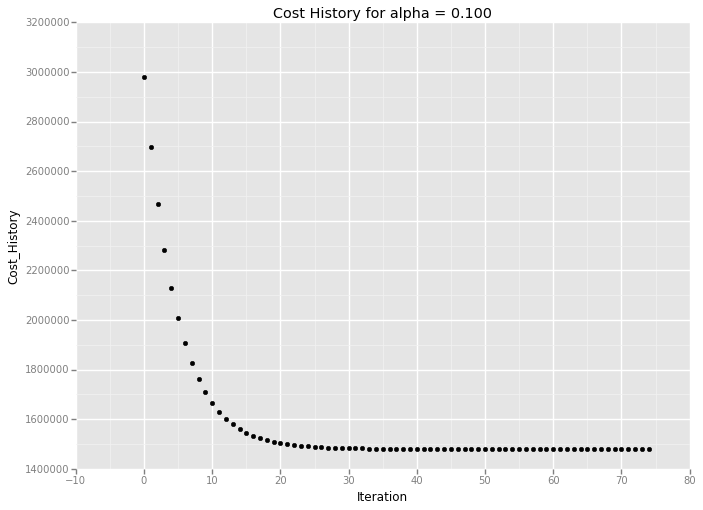

<ggplot: (286401641)>

In [18]:
pp

In [19]:
features = turnstile_weather[['rain', 'precipi', 'Hour', 'meantempi']]
dummy_units = pandas.get_dummies(turnstile_weather['UNIT'], prefix='unit')
features = features.join(dummy_units)

target = turnstile_weather['ENTRIESn_hourly']
X = features.values
y = target.values
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler().fit(X)
X = scaler.transform(X)
clf = SGDRegressor()
clf.fit(X,y)
predictions = clf.predict(X)

In [20]:
predictions

array([ 3335.99440047,  3620.13043888,  3904.26647729, ...,  1009.92040409,
        1009.92040409,  1009.92040409])

In [21]:
from sklearn.metrics import r2_score
r2_score(y, predictions, multioutput='variance_weighted')

0.40690786077173641

In [22]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist()
    return plt

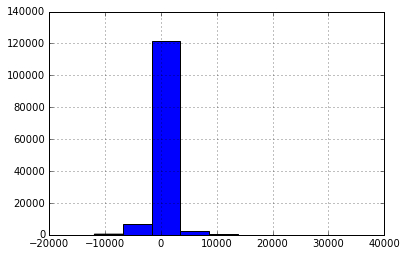

In [23]:
res = plot_residuals(turnstile_weather, pd)

In [24]:
turnstile_weather = pandas.read_csv('turnstile_data_master_with_weather.csv')

In [25]:
turnstile_weather.dtypes

Unnamed: 0           int64
UNIT                object
DATEn               object
TIMEn               object
Hour                 int64
DESCn               object
ENTRIESn_hourly    float64
EXITSn_hourly      float64
maxpressurei       float64
maxdewpti          float64
mindewpti          float64
minpressurei       float64
meandewpti         float64
meanpressurei      float64
fog                float64
rain               float64
meanwindspdi       float64
mintempi           float64
meantempi          float64
maxtempi           float64
precipi            float64
thunder            float64
dtype: object

In [26]:
features.head()

,rain,precipi,Hour,meantempi,unit_R001,unit_R002,unit_R003,unit_R004,unit_R005,unit_R006,...,unit_R543,unit_R544,unit_R545,unit_R546,unit_R547,unit_R548,unit_R549,unit_R550,unit_R551,unit_R552
0,0.0,0.0,1,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,9,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,13,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,17,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# import numpy as np
import pandas
import scipy
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
turnstile_weather = pandas.read_csv('turnstile_data_master_with_weather.csv')
features = turnstile_weather


features.drop('UNIT',axis=1, inplace=True)   # dumpy variable
features.drop('DESCn', axis=1, inplace=True)  # has one value
features.drop('Unnamed: 0', axis=1, inplace=True)  # has no pattren
features.drop('DATEn', axis=1, inplace=True)  # 
features.drop('TIMEn', axis=1, inplace=True)  # 
#features.drop('ENTRIESn_hourly', axis=1, inplace=True)  # 


feature_cols = list(features.columns.values)
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=17)
results = model.fit(features[feature_cols], features['ENTRIESn_hourly'])
k=0
print 'Feature Name      Score         Pvalue'
for feat in feature_cols:
    print feat,'\t\t',results.scores_[k],'\t',results.pvalues_[k]
    k=k+1

Feature Name      Score         Pvalue
Hour 		4189.78571513 	0.0
ENTRIESn_hourly 		3.0789920582e+18 	0.0
EXITSn_hourly 		163904.824205 	0.0
maxpressurei 		38.523928028 	5.4246586703e-10
maxdewpti 		12.9160289265 	0.000325898829637
mindewpti 		53.5168316313 	2.57833266663e-13
minpressurei 		55.5679799243 	9.08308382336e-14
meandewpti 		34.6286650659 	3.99946731146e-09
meanpressurei 		34.331509097 	4.65894250564e-09
fog 		17.0527442401 	3.63781367828e-05
rain 		1.23681114557 	0.266088536279
meanwindspdi 		93.6149291015 	3.89837533577e-22
mintempi 		111.326079128 	5.14100573622e-26
meantempi 		68.604202946 	1.21456300798e-16
maxtempi 		26.9999492072 	2.03762533188e-07
precipi 		12.3265097044 	0.000446719549191
thunder 		nan 	nan


In [28]:
# Use Pipeline
# ANOVA 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
anova_filter = SelectKBest(f_regression, k=13)
LR = LinearRegression()
anova_LinReg = Pipeline([('scaler_Input',scaler), ('anova', anova_filter), ('LinReg', LR)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
anova_LinReg.set_params(anova__k=13).fit(new_data, Y)
prediction = anova_LinReg.predict(new_data)
print anova_LinReg.score(new_data, Y)                        
# getting the selected features chosen by anova_filter
results = cross_validation.cross_val_score(anova_LinReg, new_data, Y, cv=kfold, scoring=scoring)
print 'Scoring according to mean_squared_error'
print results
print '\n Mean      Standard deviation'
print("%.2f      %.2f" % (results.mean(), results.std()))
print anova_LinReg.named_steps['anova'].get_support()
r_squared = r2_score(Y, prediction, multioutput='variance_weighted')
print 'R-squared = ',r_squared

NameError: name 'new_data' is not defined

In [ ]:

# Add UNIT to features using dummy variables
# Dummy variables is not good for prediction as there is no trasform function
# to use it in  testing and deployment time so I will use one hot
'''
dummy_units = pandas.get_dummies(features['UNIT'], prefix='unit')
features = features.join(dummy_units)
# Values
values = features['ENTRIESn_hourly']
# remove the extra columns
features.drop('ENTRIESn_hourly', axis=1, inplace=True) # label
features.drop('UNIT', axis=1, inplace=True)   # dumpy variable
features.drop('DESCn', axis=1, inplace=True)  # has one value
features.drop('Unnamed: 0', axis=1, inplace=True)  # has no pattren
features.drop('DATEn', axis=1, inplace=True)  # 
'''

######
# According to the nature of the data spasity and there is outliter RobustScaler class is recomandit 
# but when I tried both of them the result seems is same
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
# Using make_pipeline
X_train = scaler.transform(X_train)


# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=13)
anova_lr = make_pipeline(scaler, anova_filter, LR)
anova_lr.fit(new_data, Y)
prediction = anova_lr.predict(new_data)
r_squared = r2_score(Y, prediction, multioutput='variance_weighted')
print 'R-squared = ',r_squared
####

def predictions(weather_turnstile):
    #
    # Your implementation goes here. Feel free to write additional
    # helper functions
    




   






    # 
    prediction = 1
    return prediction

In [ ]:
pred = predictions(features)

In [ ]:
features.head(10)

In [ ]:
from ggplot import *

In [ ]:
print ggplot(features, aes(x = 'ENTRIESn_hourly', y = 'EXITSn_hourly'))+\
geom_point(color = 'blue') + geom_line(color = 'red')+\
ggtitle('The relation between hours') + xlab('Enternal houre') + ylab('External Houre')

In [ ]:
data = pandas.read_csv('hr_by_team_year_sf_la.csv')
#print hr_by_team_year_sf_la_csv.head()
gg = ggplot(data, aes('yearID', 'HR', color='teamID'))+geom_point()+geom_line()+ggtitle('Hit by player')+\
xlab('Team ID')+ylab('HR')